
# Project: Tausworthe Pseudo-Random Number Generator Implementation
### ISYE 6644 | Summer 2023 
**Group 247 - Shinnosuke Jay Nonaka**


### Abstract
The focus of this project is the code implementation of the Tausworthe pseudo-random number (PRN) generator. Developed by Peter Tausworthe in 1965, this PRN generator is an application of linear-feedback shift register (LFSR) where the generated PRN is a deterministic and linear function of its previous state. This generator possesses many excellent properties including long periods, relatively easy implementation, and computational efficiency. A walk-through of the Tausworthe PRN generator code implementation and steps to initialize and generate pseudo-random numbers are 
documented. 

After code implementation documentation, the Tausworthe PRN generator is initialized with default parameters. The quality of the generator with the default parameters is assessed via statistical tests and visual inspection of adjacent plots, and the implemented Tausworthe PRN generator is used to generate a pseudo-random unit normal via a Box-Muller transformation. As a result of this project, it is concluded that the Tausworthe PRN generator is an effective pseudo-random number generator which can be implemented easily.

### Package Imports

In [1]:
# Import all packages
import pandas as pd
import numpy as np
from scipy.stats import chisquare
from statsmodels.sandbox.stats.runs import runstest_1samp 
import matplotlib
import matplotlib.pyplot as plt

### Code Implementation

**_TausworthePRNG Class_**

In [2]:
class TausworthePRNG:
    def __init__(self, seed, r, q, l):
        # check function
        self.checks(seed, r, q, l)
        
        # This expression adds leading 0's to the seed if the seed's bit length is less than the r, q, or l values
        self.state =  (max(r, q, l) - len(str(bin(seed)[2:])))*'0' + str(bin(seed)[2:])
        self.seed = bin(seed)
        self.r, self.q, self.l = r, q, l
    
    # Main function. Generates a Unif(0,1) random variable
    def generate_num(self):
        rand_num = self.convert_bin_to_num()
        self.update_bin_seq()
        return rand_num
    
    # Converts binary value to a Unif(0,1) RV based on l value
    def convert_bin_to_num(self):
        num = int(self.state[:self.l],2) / (2**self.l)
        # return str(int(self.state[:self.l],2)) + '/'+ str((2**self.l))
        return num
    
    # Converts binary value to a Unif(0,1) RV based on l value
    def update_bin_seq(self):
        for i in range(self.l):
            r_bit, q_bit = int(self.state[-self.r]), int(self.state[-self.q])
            self.state = self.state + str(r_bit ^ q_bit)
        
        self.state = self.state[self.l:]
        return
    
    def checks(self, seed, r, q, l):
        # Checks whether r, q, and l values are greater than 0
        if min(r, q, l) < 1:
            raise Exception('The r, q, and l values must be greater than 0')
            
        # Checks whether the seed value is positive 
        if seed < 1:
            raise Exception('The seed value must be greater than 0')
            
        # Checks whether r, q, and l values are whole numbers
        if r % 1 != 0 or q % 1 != 0 or l % 1 != 0:
            raise Exception('The r, q, and l values must be whole integers (no decimal)')            
        
        # Checks that q value is greater than r value
        if q <= r:
            raise Exception('The q value must be greater than the r value')

**_Initialization and Generating Psuedo-Random Numbers_**

_1. Initialize Tausworthe PRN Generator_
<br> Set the seed and the r, q, and l values. The default values set below are r = 17, q = 27, l = 24, and seed = $10100010101100$ (10,412 in integer form)

In [3]:
r, q, l = 17, 27, 24
seed = 0b10100010101100

TPRN_generator = TausworthePRNG(seed, r, q, l)

_2. Specify the number of random numbers (default = 2,000)_

In [4]:
# Change the below number to the number of random numbers desired
rand_nums_to_generate = 2000

# Generated random numbers in a list 
rand_nums = [TPRN_generator.generate_num() for i in range(rand_nums_to_generate)]

### Statistical Tests

**_Goodness-of-fit Test: Chi-Squared $({\chi}^2)$ Test_**
<br> First, divide the unit interval into equal 10 equal cells (k = 10). Then, count the number or PRN observations in each cell.

In [5]:
# Count the number of PRNs that fall within each bucket
df = pd.DataFrame(rand_nums).rename(columns = {0:'PRN Count'})
df = df.apply(lambda x: pd.cut(x, bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]).value_counts()).sort_index()
df.transpose()

,"(0.0, 0.1]","(0.1, 0.2]","(0.2, 0.3]","(0.3, 0.4]","(0.4, 0.5]","(0.5, 0.6]","(0.6, 0.7]","(0.7, 0.8]","(0.8, 0.9]","(0.9, 1.0]"
PRN Count,185,200,194,196,196,202,224,209,199,195


Perform chi-Squared $({\chi}^2)$ test

In [6]:
alpha = 0.05

# Chi-Square Test
chisq, p_val = chisquare(list(df['PRN Count']))

print('Null Hypothesis: The randomly generated data points are uniform')
print(f'alpha = {alpha}')
print('**************************')
print(f'Chi-Square = {round(chisq,3)}')
print(f'p value = {p_val:4.3f}')
print('**************************')
if p_val > alpha:
    print('Failed to reject the null hypothesis')
else:
    print('Null hypothesis is rejected!')

Null Hypothesis: The randomly generated data points are uniform
alpha = 0.05
**************************
Chi-Square = 4.9
p value = 0.843
**************************
Failed to reject the null hypothesis


**_Independence Test: Runs Test_**

In [7]:
alpha = 0.05

# Run Test
z_stat, p_val= runstest_1samp(rand_nums, correction=False)

print('Null Hypothesis: The randomly generated data points are independent')
print(f'alpha = {alpha}')
print('**************************')
print(f'Z-statistic = {round(z_stat,3)}')
print(f'p value = {round(p_val,3)}')
print('**************************')
if p_val > alpha:
    print('Failed to reject the null hypothesis')
else:
    print('Null hypothesis is rejected!')

Null Hypothesis: The randomly generated data points are independent
alpha = 0.05
**************************
Z-statistic = 0.052
p value = 0.958
**************************
Failed to reject the null hypothesis


### Adjacent Plots

**_Unit Square_**

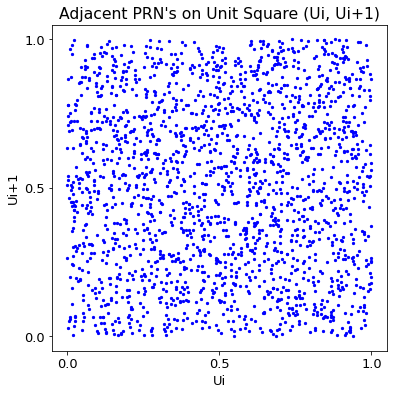

In [8]:
matplotlib.rc('font', size = 13)

plt.figure(figsize=(6,6))
plt.scatter(rand_nums[:-1], rand_nums[1:], c ="blue", s=5)
plt.title('Adjacent PRN\'s on Unit Square (Ui, Ui+1)')
plt.xlabel('Ui')
plt.ylabel('Ui+1')
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])
plt.show()

**_Unit Cube_**

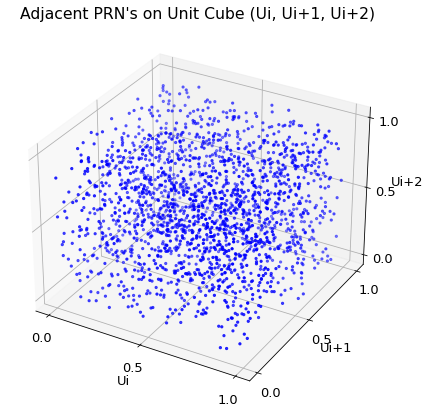

In [9]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')
 
plt.title('Adjacent PRN\'s on Unit Cube (Ui, Ui+1, Ui+2)')
ax.scatter3D(rand_nums[:-2], rand_nums[1:-1], rand_nums[2:], color = "blue", s=5)
ax.set_xlabel('Ui')
ax.set_ylabel('Ui+1')
ax.set_zlabel('Ui+2')
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_zticks([0, 0.5, 1])
plt.show()

### Nor(0,1) Generation using TausworthePRNG Generator

Use Box–Muller transformation to convert Unif(0,1) PRNs into Nor(0,1) PRNs. The Box-Muller transformation equation is

$$
Z = \sqrt{-2lnU_1}cos(2\pi U_2)
$$

In [10]:
# Convert first 2,000 PRNs into numpy array and generate an additional 2,000 PRNs in second numpy array
rand_nums_unif1 = np.array(rand_nums)
rand_nums_unif2 = np.array([TPRN_generator.generate_num() for i in range(rand_nums_to_generate)])

# Apply the above equation
rand_nums_normal = np.sqrt(-2 * np.log(rand_nums_unif1)) * np.cos(2 * np.pi * rand_nums_unif2)

Plot the generated normal random variables from previous cell against the probability density funtion of a standard normal distribution

$$
f(x)= {\frac{1}{\sigma\sqrt{2\pi}}}e^{- {\frac {1}{2}} (\frac {x-\mu}{\sigma})^2}
$$

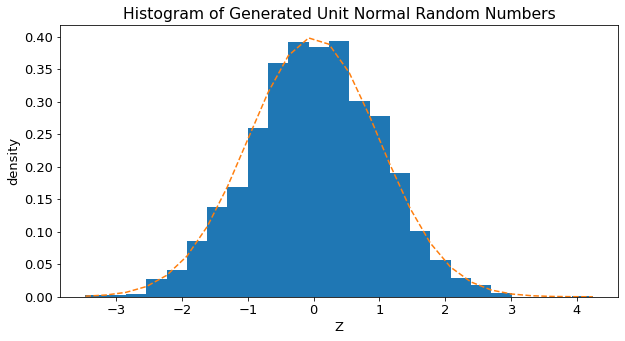

In [11]:
fig, ax = plt.subplots(figsize = (10,5))

# Histogram for generated normal random variables from previous cell
n, bins, patches = ax.hist(rand_nums_normal, 25, density = True)

# Line graph for standard normal
unit_normal_pdf = ((1 / (np.sqrt(2 * np.pi))) * np.exp(-0.5 * (bins)**2))
ax.plot(bins, unit_normal_pdf, '--')
ax.set_xlabel('Z')
ax.set_ylabel('density')
ax.set_title('Histogram of Generated Unit Normal Random Numbers')

plt.show()